In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import cv2
import numpy as np
from skimage.color import label2rgb
import seaborn as sns

In [2]:
palette = sns.color_palette("Set1", 80)

In [3]:
label_path = "/home/dkermany/data/COCO/masks/val2017/000000460229.png"
image_path = "/home/dkermany/data/COCO/images/val2017/000000460229.jpg"
pred_path = "/home/dkermany/data/COCO/images/val2017_predictions/000000460229.png"

(640, 383, 3)


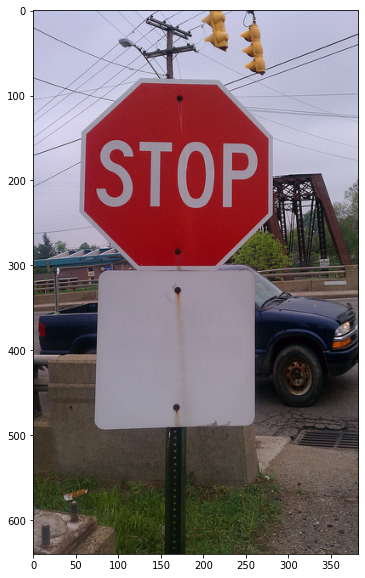

In [4]:
image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
print(image.shape)
plt.figure(figsize=(10,10))
plt.imshow(image)

(640, 383)


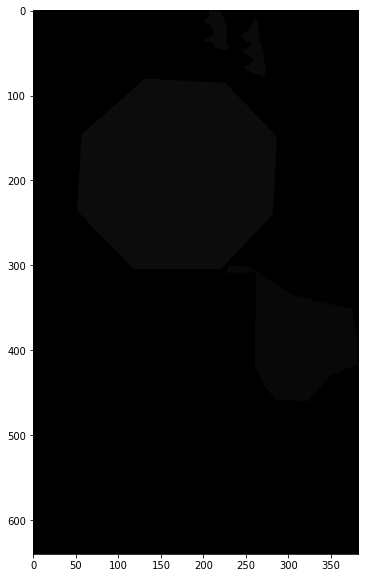

In [5]:
label = cv2.imread(label_path, 0)
print(label.shape)
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(label, cv2.COLOR_GRAY2RGB))

(640, 383, 3)
[ 77 175  74]


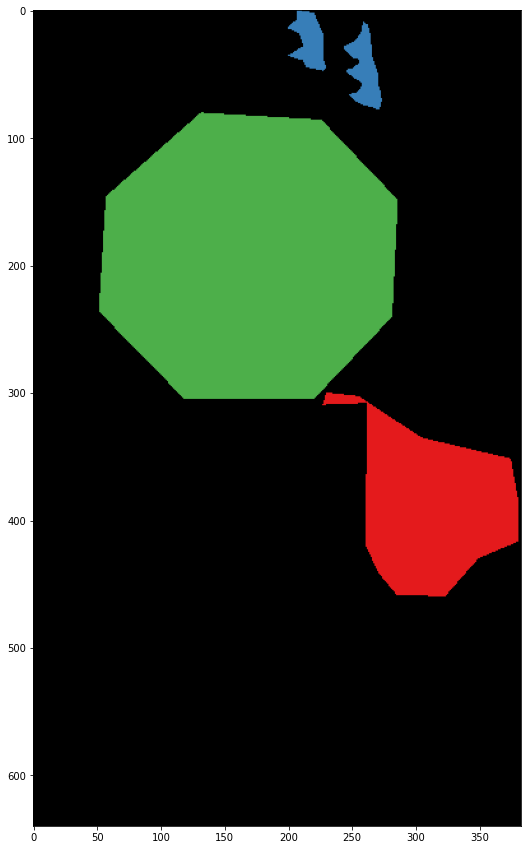

In [6]:
rgb_label = label2rgb(label, bg_label=0, colors=palette)
rgb_label = (rgb_label*255).astype("uint8")
plt.figure(figsize=(15,15))
plt.imshow(rgb_label)
print(rgb_label.shape)
print(rgb_label[150][200])

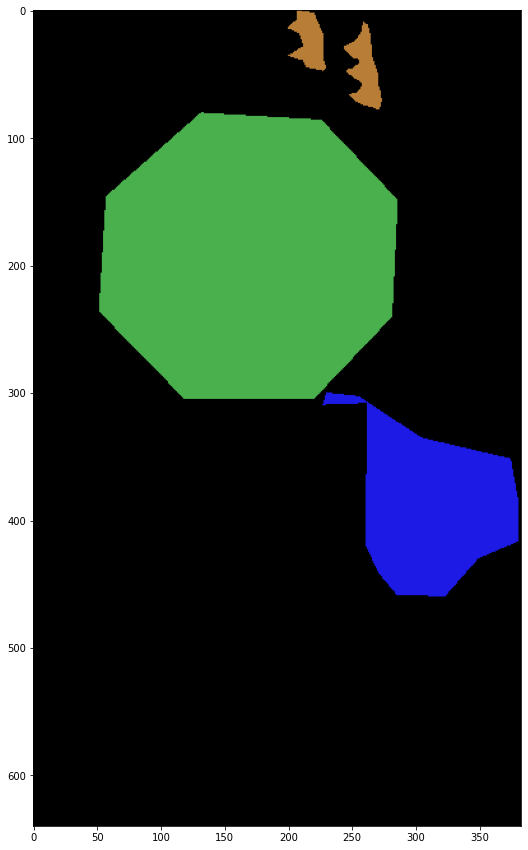

In [7]:
bgr_label = cv2.cvtColor(rgb_label, cv2.COLOR_RGB2BGR)
plt.figure(figsize=(15,15))
plt.imshow(bgr_label)

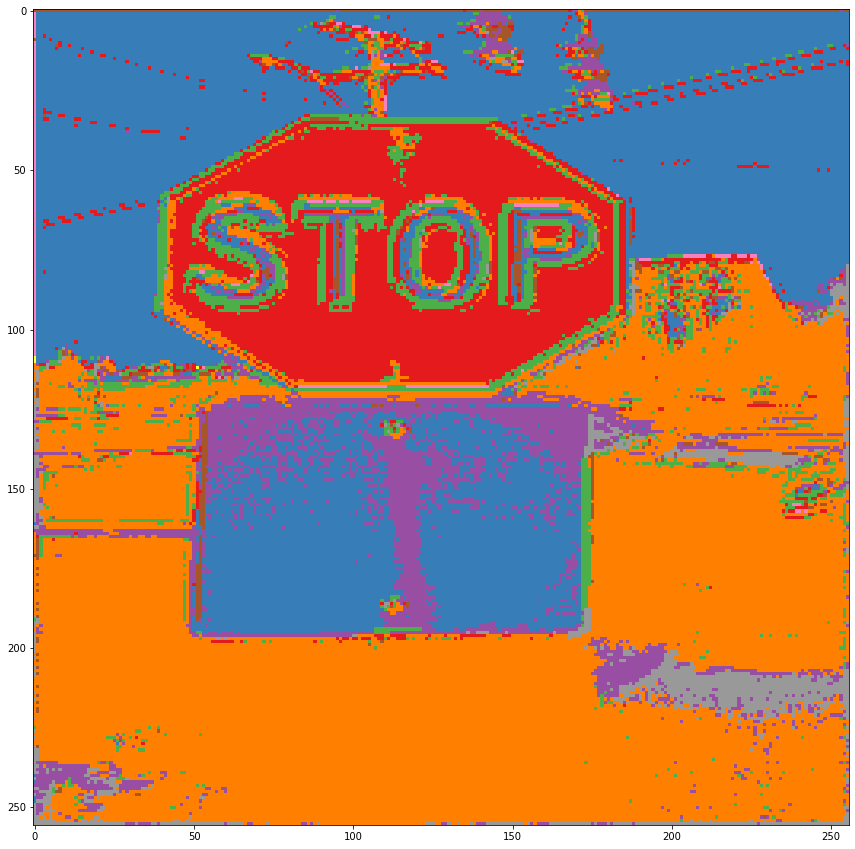

In [10]:
pred = cv2.imread(pred_path)
plt.figure(figsize=(15,15))
plt.imshow(cv2.cvtColor(pred, cv2.COLOR_BGR2RGB))